In [1]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m ''
# !git push

!pip install -Uqq fastbook
from fastai.text.all import *

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 189 kB 47.7 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 44.8 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 318 kB/s 
     |████████████████████████████████| 558 kB 43.7 MB/s 
     |████████████████████████████████| 130 kB 48.7 MB/s 


In [2]:
path = untar_data(URLs.IMDB)

In [3]:
path.ls()

(#7) [Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/train')]

In [4]:
dls = DataBlock(
    blocks=(TextBlock.from_folder(path), CategoryBlock),
    get_y=parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

In [5]:
files = get_text_files(path, folders=['train', 'test'])
txts = L(o.open().read() for o in files[:2000])

In [6]:
tok = Tokenizer.from_folder(path)
tok.path

Path('/root/.fastai/data/imdb')

In [7]:
tok.output_dir

Path('/root/.fastai/data/imdb_tok')

In [8]:
tok.setup(txts)
toks = txts.map(tok)
toks[0]

(#374) ['xxbos','xxmaj','first','of','all',',','i','would','like','to'...]

In [9]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([  2,   8, 114,  14,  48,  11,  18,  72,  49,  15])

In [10]:
nums_dec = num.decode(nums[0][:10])
nums_dec

(#10) ['xxbos','xxmaj','first','of','all',',','i','would','like','to']

In [11]:
def f(x:int): return x + 1
tfm = Transform(f)
tfm(2),tfm(2.0)

(3, 2.0)

In [12]:
@Transform
def f(x:int): return x+1
f(2),f(2.0)

(3, 2.0)

In [13]:
class NormalizeMean(Transform):
    def setups(self, items): self.mean = sum(items) / len(items)
    def encodes(self, x): return x - self.mean
    def decodes(self, x): return x + self.mean

In [14]:
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start = 2
y = tfm(start)
z = tfm.decode(y)
tfm.mean, y, z

(3.0, -1.0, 2.0)

In [15]:
tfms = Pipeline([tok, num])
t = tfms(txts[0])
t[:20]

TensorText([  2,   8, 114,  14,  48,  11,  18,  72,  49,  15, 149,  21,  18, 265,
         12, 340,  14,  48,  14,   9])

In [16]:
tfms.decode(t)[:100]

'xxbos xxmaj first of all , i would like to say that i am a fan of all of the actors that appear in t'

In [19]:
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])

In [20]:
t = tls[0]
t[:20]

TensorText([  2,   8, 107,  14,  45,  11,  19,  74,  53,  15, 159,  21,  19, 258,
         13, 359,  14,  45,  14,   9])

In [21]:
tls.decode(t)[:100]

'xxbos xxmaj first of all , i would like to say that i am a fan of all of the actors that appear in t'

In [22]:
tls.show(t)

xxbos xxmaj first of all , i would like to say that i am a fan of all of the actors that appear in this film and at the time that i rented it , i wanted to like it . 

 i think that the main reason that i was so disappointed was that the outside box promised me a suspense thriller . xxmaj in my eyes , a suspense thriller for xxmaj british movies is like something out of a xxmaj ruth xxmaj rendell novel , something that has a lot of dark twist and turns and leaves the viewer with an ending that is unlikely to be forgotten anytime soon . 

 xxmaj this movie started out with the promising note of being such a film . xxmaj we have our main character , that suspects a man that he does not like , of being involved in a hit and run that killed the husband of one of his xxunk notions prove to be right , but the idea that his wife might be involved , does not occur to him until that she confesses to him that she was a part of the crime . 

 xxmaj the elements of a good suspense thriller were in

In [23]:
cut = int(len(files)*0.8)
splits = [list(range(cut)), list(range(cut, len(files)))]
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize],
                splits=splits)

In [24]:
tls.valid[0][:20]

TensorText([    2,     8,    20,    25,    13,  9297,   174,   224,    28,    13,
          103,   198,    10,     8,   319,     8,  6901,    12,     8, 32359])

In [25]:
lbls = files.map(parent_label)

In [26]:
lbls

(#50000) ['neg','neg','neg','neg','neg','neg','neg','neg','neg','neg'...]

In [27]:
cat = Categorize()
cat.setup(lbls)
cat.vocab, cat(lbls[0])

(['neg', 'pos'], TensorCategory(0))

In [28]:
tls_y = TfmdLists(files, [parent_label, Categorize()])
tls_y[0]

TensorCategory(0)

In [29]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms])

In [30]:
x, y = dsets[0]
x[:20], y

(TensorText([  2,   8, 107,  14,  45,  11,  19,  74,  53,  15, 159,  21,  19, 258,
          13, 359,  14,  45,  14,   9]), TensorCategory(0))

In [31]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)
x, y = dsets.valid[0]
x[:20], y


(TensorText([    2,     8,    20,    25,    13,  9297,   174,   224,    28,    13,
           103,   198,    10,     8,   319,     8,  6901,    12,     8, 32359]),
 TensorCategory(1))

In [32]:
dls = dsets.dataloaders(bs=64, before_batch=pad_input)

In [34]:
tfms = [[Tokenizer.from_folder(path), Numericalize],
        [parent_label, Categorize]]
files = get_text_files(path, folders=['train', 'test'])
splits = GrandparentSplitter(valid_name='test')(files)
dsets = Datasets(files, tfms, splits=splits)
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)

In [35]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/'images')

In [36]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        img1, img2, same_breed = self
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1, t2 = tensor(img1), tensor(img2)
            t1, t2 = t1.permute(2, 0, 1), t2.permute(2, 0, 1)
        else: t1, t2 = img1, img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1, line, t2], dim=2),
                          title=same_breed, ctx=ctx)

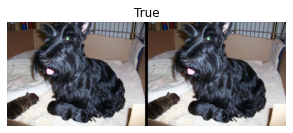

In [37]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)
s.show()

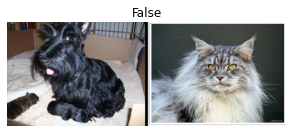

In [38]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)
s1.show()

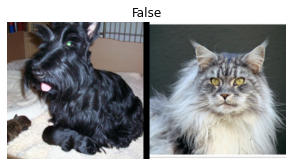

In [39]:
s2 = Resize(224)(s1)
s2.show()

In [40]:
def label_func(fname):
    return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [41]:
class SiameseTransform(Transform):
    def __init__(self, files, label_func, splits):
        self.labels = files.map(label_func).unique()
        self.lbl2files = {l: L(f for f in files if label_func(f) == l)
                          for l in self.labels}
        self.label_func = label_func
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
    
    def encodes(self, f):
        f2, t = self.valid.get(f, self._draw(f))
        img1, img2 = PILImage.create(f), PILImage.create(f2)
        return SiameseImage(img1, img2, t)
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = self.label_func(f)
        if not same:
            cls = random.choice(L(l for l in self.labels if l != cls))
        return random.choice(self.lbl2files[cls]), same


In [48]:
splits = RandomSplitter()(files)
len(splits[1])

1478

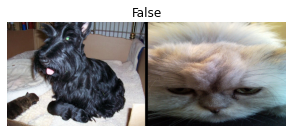

In [49]:
tfm = SiameseTransform(files, label_func, splits)
tfm(files[0]).show()

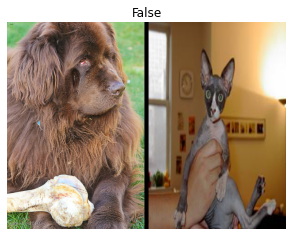

In [50]:
tls = TfmdLists(files, tfm, splits=splits)
show_at(tls.valid, 0)

In [51]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
    after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])